In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the clustered data (adjust path as needed)
data_path = '../../data/input/full-featured.csv'
df = pd.read_csv(data_path)

# If you have a saved clustered DataFrame, load it here instead
# df = pd.read_csv('path_to_clustered_data.csv')

# If needed, re-run clustering to get the 'cluster' column
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = [
    'daily_return', 'volume', 'log_return', 'price_range',
    'ma_5', 'ma_20', 'volatility_5', 'volatility_20',
    'rsi_14', 'macd_12_26', 'macd_signal_12_26', 'macd_histogram_12_26',
    'stoch_14', 'stoch_smoothk', 'stoch_smoothd','trend_code'
]
X = df[features].dropna().copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k = 3  # Use the number of clusters you chose previously
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_clustered = df.loc[X.index].copy()
df_clustered['cluster'] = clusters
df_clustered.head()

,date,Open,High,Low,Close,volume,turnover,daily_return,log_return,price_range,...,stoch_smoothd,dow_trend_spec_raw,dow_trend_spec,range,avg_range,is_mother_candle,mother_candle_trend,final_trend,trend_code,cluster
33,2013-09-20 00:00:00+05:30,6104.55,6130.95,5932.85,6012.10,318645265,11587.18,-0.016916,-0.017061,198.10,...,90.184766,Downtrend,Downtrend,198.10,124.570,True,Sideways,Downtrend,0,0
34,2013-09-23 00:00:00+05:30,5945.80,5989.40,5871.40,5889.75,188322506,6596.17,-0.020351,-0.020561,118.00,...,88.599065,Downtrend,Downtrend,118.00,125.420,False,Downtrend,Downtrend,0,2
35,2013-09-24 00:00:00+05:30,5855.00,5938.40,5854.55,5892.45,187578148,7002.84,0.000458,0.000458,83.85,...,82.820526,Sideways,Downtrend,83.85,125.900,False,Downtrend,Downtrend,0,2
36,2013-09-25 00:00:00+05:30,5901.55,5910.55,5811.10,5873.85,200162195,6988.96,-0.003157,-0.003162,99.45,...,74.080671,Downtrend,Downtrend,99.45,123.215,False,Downtrend,Downtrend,0,2
37,2013-09-26 00:00:00+05:30,5872.80,5917.65,5864.10,5882.25,220589737,7761.99,0.001430,0.001429,53.55,...,66.161647,Uptrend,Uptrend,53.55,115.950,False,Downtrend,Uptrend,2,2


In [5]:
# Mean and std of features by cluster
profile = df_clustered.groupby('cluster')[features].agg(['mean', 'std'])
profile

daily_return                  volume               log_return  \
                mean       std          mean           std       mean   
cluster                                                                 
0           0.002428  0.006892  3.192098e+08  1.791516e+08   0.002402   
1          -0.004682  0.016012  3.896100e+08  2.181703e+08  -0.004823   
2           0.000421  0.008765  2.449711e+08  1.378260e+08   0.000383   

                  price_range                      ma_5               ...  \
              std        mean         std          mean          std  ...   
cluster                                                               ...   
0        0.006866  129.158077   78.973246  14378.181378  5865.807222  ...   
1        0.016204  259.509800  147.661007  18090.928512  5376.454358  ...   
2        0.008754  102.802996   46.516770   9892.238540  3141.047482  ...   

        macd_histogram_12_26              stoch_14            stoch_smoothk  \
                        mean        std       mean        std          mean   
cluster                                                                       
0                  24.064079  35.478708  84.734668  13.403572     83.821090   
1                 -45.245083  51.432186  25.298159  18.562386     28.633902   
2                 -13.737435  22.822111  41.004554  23.290476     40.634252   

                   stoch_smoothd            trend_code            
               std          mean        std       mean       std  
cluster                                                           
0        11.820123     82.261154  12.839332   1.370513  0.858061  
1        17.465984     31.270149  18.829713   0.626134  0.805643  
2        20.394515     41.761096  20.800814   0.990196  0.919267  

[3 rows x 32 columns]

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_17044\2677951597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_17044\2677951597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_17044\2677951597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')
C:\Users\Sandeep\AppData\

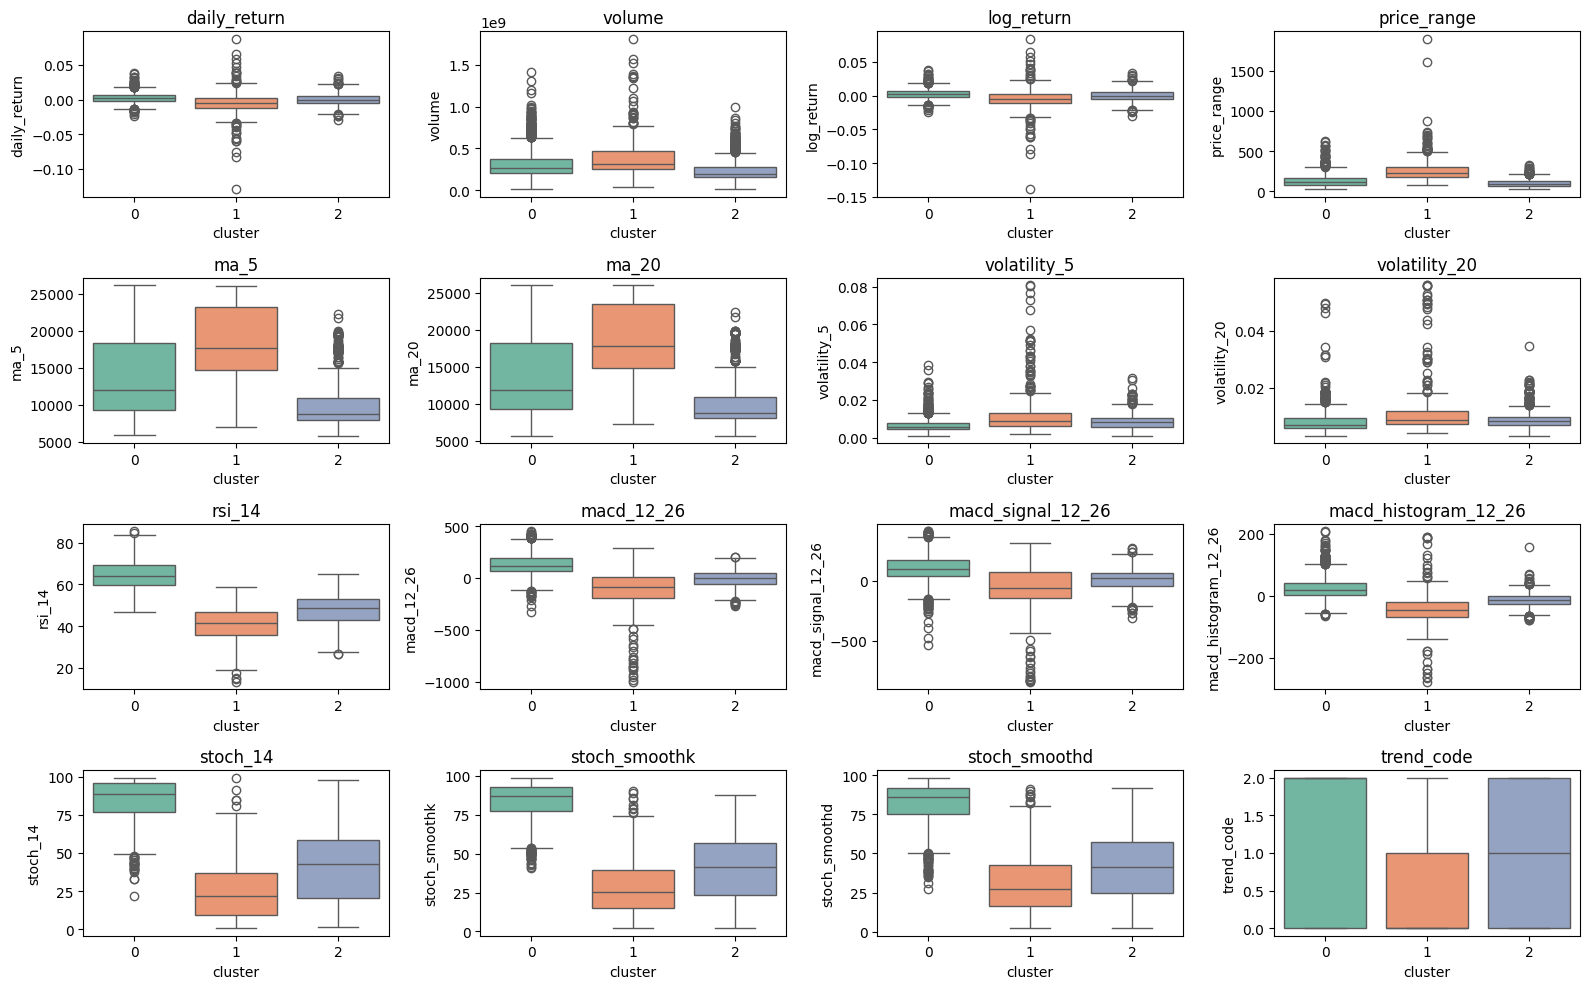

In [6]:
# Boxplots for each feature by cluster
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')
    plt.title(feature)
    plt.tight_layout()
plt.show()